In [1]:
from importlib import reload
import time
import joblib
from pylab import *
from tqdm import tqdm


import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs
reload(vs)



<module 'helper_visa' from 'C:\\Users\\mathusla\\Documents\\MATHUSLA\\JupyterNotebooks\\Hardware\\Keysight\\..\\helper_visa.py'>

# Step 1: connect to the scope
- If you don't know the address, do vs.connect()
- Otherwise, put the address in the argument will speed it up

In [2]:
scope = vs.connect(address = "TCPIP0::10.0.0.4::inst0::INSTR", timeout=30_000) # set 30 second

Connected to VISA [TCPIP0::10.0.0.4::inst0::INSTR]:  KEYSIGHT TECHNOLOGIES,EXR054A,MY63160110,11.50.00201



# Example 1: read the current waveform from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

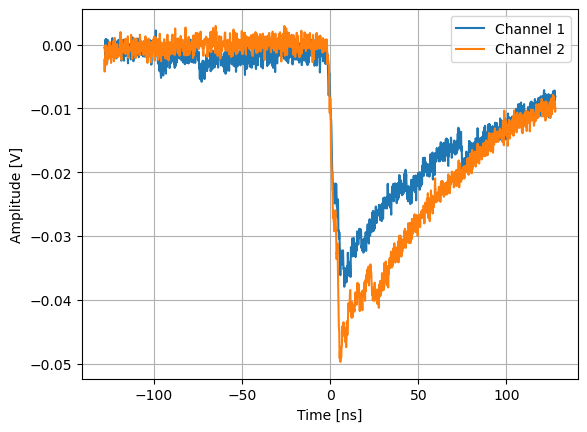

In [3]:
trigger_channel = 1
read_channel = [1,2]
acquire_length = 2048

data,time_series=vs.read_waveform(scope, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True, initialize = True, calibration_data=None)

for ch in data:
    plot(time_series*1e9, data[ch], label=f"Channel {ch}")

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
legend()
grid()

# Example 2: repetitively read multiple waveforms from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

4/40 events acquired, time elapsed 0.6 s, time from last print 0.6 s
8/40 events acquired, time elapsed 3.2 s, time from last print 2.6 s
12/40 events acquired, time elapsed 5.0 s, time from last print 1.8 s
16/40 events acquired, time elapsed 9.3 s, time from last print 4.3 s
20/40 events acquired, time elapsed 12.9 s, time from last print 3.6 s
24/40 events acquired, time elapsed 13.9 s, time from last print 1.0 s
28/40 events acquired, time elapsed 16.4 s, time from last print 2.5 s
32/40 events acquired, time elapsed 20.9 s, time from last print 4.5 s
36/40 events acquired, time elapsed 23.3 s, time from last print 2.4 s
40/40 events acquired, time elapsed 24.7 s, time from last print 1.4 s


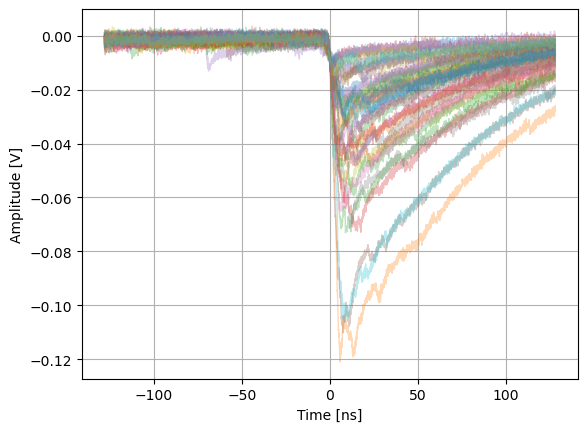

In [6]:
data_save = vs.get_events(scope, Nevents = 40, print_every_n = 4, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
time_series = data_save["metadata"]["time_series"]*1e9

for i in range(len(data_save[1])):
    plot(time_series, data_save[1][i],alpha=0.3, linewidth=1)

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
grid()

# Acquire the data

In [ ]:
data_save = vs.get_events(scope, Nevents = 7200, print_every_n = 400, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
# joblib.dump(data_save, "muon_coinc_ch1_ch2.joblib",compress =False) # threshold CH1=20 mV ~8eh
joblib.dump(data_save, "muon_coinc_ch1_ch2_coinc.joblib",compress =False) # threshold CH1=10 mV ~8eh && CH2=10 mV ~8eh

400/7200 events acquired, time elapsed 251.1 s, time from last print 251.1 s
800/7200 events acquired, time elapsed 508.3 s, time from last print 257.2 s
1200/7200 events acquired, time elapsed 771.9 s, time from last print 263.6 s
1600/7200 events acquired, time elapsed 1026.7 s, time from last print 254.8 s
2000/7200 events acquired, time elapsed 1290.8 s, time from last print 264.0 s
2400/7200 events acquired, time elapsed 1551.7 s, time from last print 261.0 s
2800/7200 events acquired, time elapsed 1806.2 s, time from last print 254.4 s
3200/7200 events acquired, time elapsed 2081.2 s, time from last print 275.0 s
3600/7200 events acquired, time elapsed 2358.8 s, time from last print 277.7 s
4000/7200 events acquired, time elapsed 2621.3 s, time from last print 262.4 s
4400/7200 events acquired, time elapsed 2853.2 s, time from last print 232.0 s
4800/7200 events acquired, time elapsed 3121.1 s, time from last print 267.9 s
5200/7200 events acquired, time elapsed 3379.7 s, time fr

In [28]:
data_save = vs.get_events(scope, Nevents = 2000, print_every_n = 200, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, "waveform_scintillator.joblib",compress =False)

200/2000 events acquired, time elapsed 100.7 s, time from last print 100.7 s
400/2000 events acquired, time elapsed 207.5 s, time from last print 106.7 s
600/2000 events acquired, time elapsed 315.7 s, time from last print 108.2 s
800/2000 events acquired, time elapsed 421.3 s, time from last print 105.7 s
1000/2000 events acquired, time elapsed 519.9 s, time from last print 98.6 s
1200/2000 events acquired, time elapsed 622.2 s, time from last print 102.3 s
1400/2000 events acquired, time elapsed 726.9 s, time from last print 104.7 s
1600/2000 events acquired, time elapsed 832.6 s, time from last print 105.6 s
1800/2000 events acquired, time elapsed 936.0 s, time from last print 103.4 s
2000/2000 events acquired, time elapsed 1041.6 s, time from last print 105.6 s


# Analysis 1: Coinicidence time resolution

In [37]:
data_save=joblib.load("muon_coinc_ch1_ch2.joblib")
time_series = data_save["metadata"]["time_series"]*1e9
amp2eh = 0.0025 # 2.5 mV/eh

### Try the fit on one event

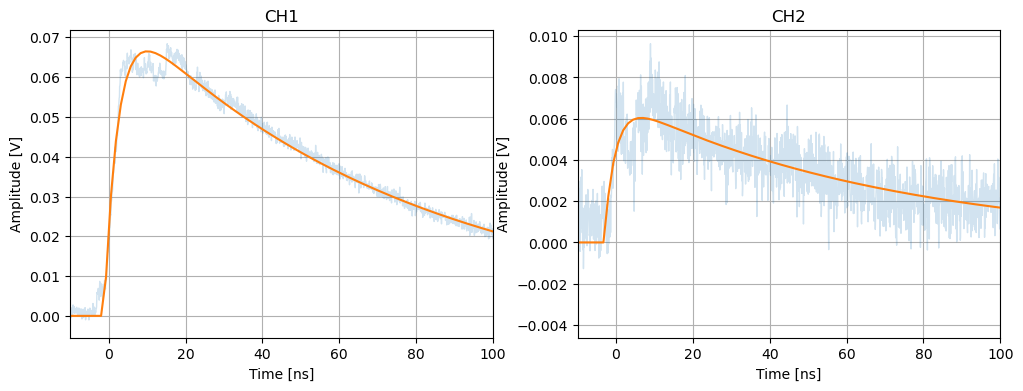

In [53]:
# for i in range(len(data_save[1])):
fig,axs = subplots(1,2,figsize=(12,4))

for iax in [0,1]:
    sca(axs[iax])
    for i in range(1):
        x=time_series
        y=-data_save[iax+1][i]
        plot(x, y ,alpha=0.2, linewidth=1)
        
        popt, pcov, info, f = hp.fit_curve(hp.Pulse,x,y, p0=[np.max(y), x[np.argmax(y)], 5., 30], makeplot=True)        
        
    title(f"CH{iax+1}")

    xlim(-10,100)
    xlabel("Time [ns]")
    ylabel("Amplitude [V]")
    grid()
show()



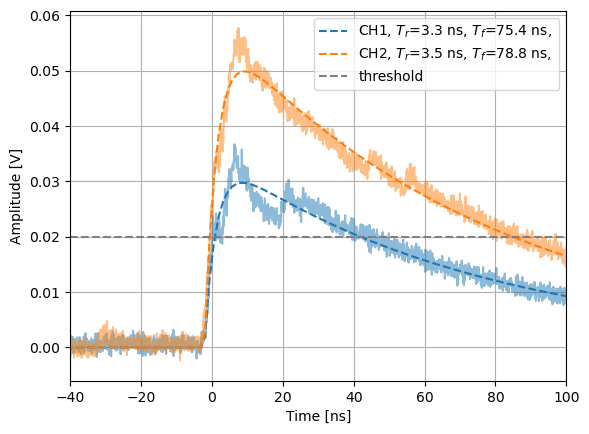

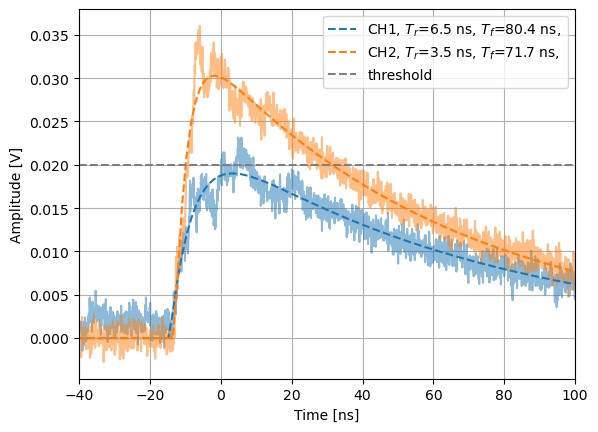

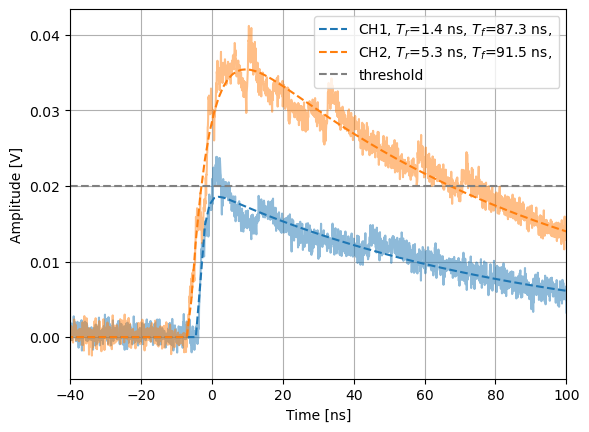

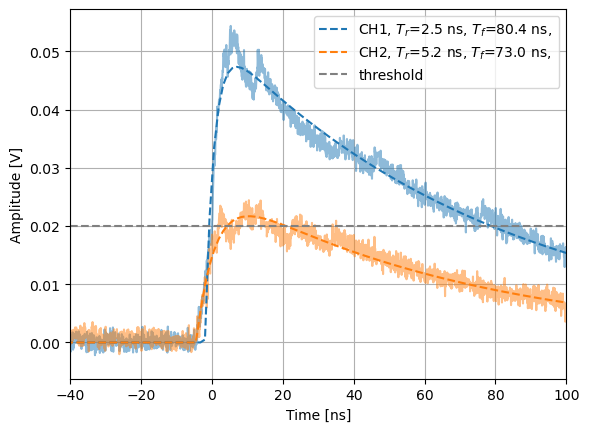

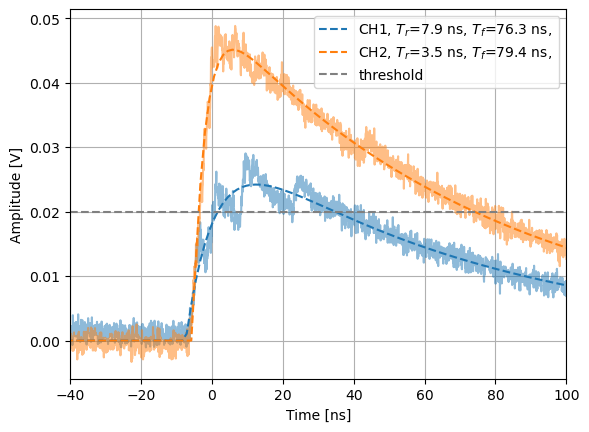

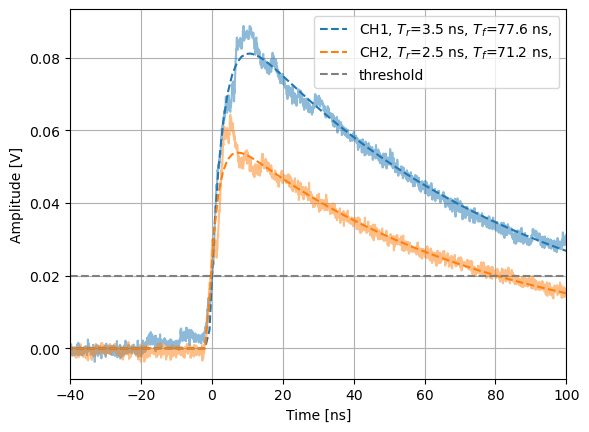

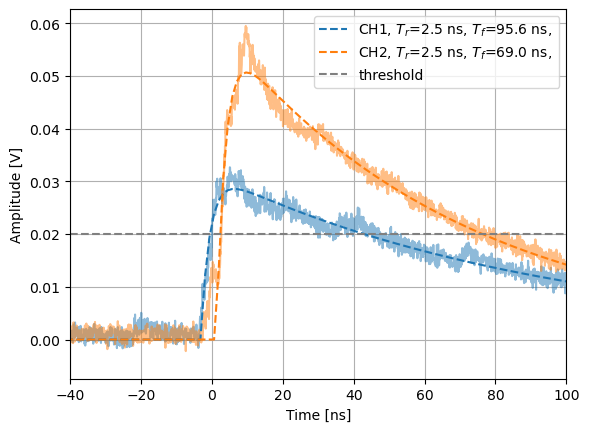

In [65]:
for i in range(20):
    
    if max(-data_save[2][i])>0.02:
        # CFD trigger
        plot(time_series, -data_save[1][i], alpha=0.5)
        plot(time_series, -data_save[2][i], alpha=0.5)
        
        x=time_series
        y=-data_save[1][i]
        popt, pcov, info, f = hp.fit_curve(hp.Pulse,x,y, p0=[np.max(y), x[np.argmax(y)], 3.5, 70], makeplot=True, color="C0", linestyle="--", label="CH1, $T_r$={popt[2]:.1f} ns, $T_f$={popt[3]:.1f} ns, ")           
        y=-data_save[2][i]
        popt, pcov, info, f = hp.fit_curve(hp.Pulse,x,y, p0=[np.max(y), x[np.argmax(y)], 3.5, 70], makeplot=True, color="C1", linestyle="--", label="CH2, $T_r$={popt[2]:.1f} ns, $T_f$={popt[3]:.1f} ns, ")           
        
        axhline(0.02, linestyle="--", color="grey", label="threshold")
        xlim(-40,100)
        xlabel("Time [ns]")
        ylabel("Amplitude [V]")
        grid()
        legend()
        show()

In [141]:
trigger_threshold_edge

0.01125

In [97]:

trigger_threshold_edge = amp2eh*4.5
trigger_threshold_cfd  = 0.5



process_result = {}
for ch in [1,2]:
    process_result[f"trigger_time_edge_{ch}"]=[]
    process_result[f"trigger_time_cfd_{ch}"]=[]
    process_result[f"trigger_time_fit_{ch}"]=[]
    process_result[f"amplitude_{ch}"]=[]
    process_result[f"amplitude_fit_{ch}"]=[]
    process_result[f"trise_fit_{ch}"]=[]
    process_result[f"tfall_fit_{ch}"]=[]
    process_result[f"fit_chi2_{ch}"]=[]
    

for i in tqdm(range(len(data_save[2]))):
# for i in tqdm(range(1000)):
    for ch in [1,2]:
        x=time_series
        y=-data_save[ch][i]
        dt = (time_series[1]-time_series[0])
        
        

        # Edge trigger:
        trigger_time_edge = (np.argmax( y>trigger_threshold_edge)-2048)*dt
        amplitude = np.max(y)
    
    
        # CFD trigger
        leading_edges = hp.constant_fraction_discriminator(y, 0, trigger_threshold_edge, trigger_threshold_cfd, gauss_filter=8)
        if len(leading_edges)>0:
            trigger_time_cfd = (leading_edges[0][1]-2048)*(time_series[1]-time_series[0])
        else:
            trigger_time_cfd = -999
           
        # Fit
        try:
            popt, pcov, info, f = hp.fit_curve(hp.Pulse,x,y, p0=[np.max(y), x[np.argmax(y)], 3.5, 70], maxfev=1000, makeplot=False, color="C0", linestyle="--", label="CH1, $T_r$={popt[2]:.1f} ns, $T_f$={popt[3]:.1f} ns, ") 
            chi2=np.linalg.norm(info["fvec"])
        except KeyboardInterrupt:
            print("  KeyboardInterrupt. You pressed ctrl c...")
            break                
        except Exception as e: # Any other exception
            # print("  Exception:", str(e)) # Displays the exception without raising it
            popt = [-999, -999, -999, -999]
            chi2=-999
            
        trigger_time_fit = popt[1]
        
        process_result[f"trigger_time_edge_{ch}"].append(trigger_time_edge)
        process_result[f"trigger_time_cfd_{ch}"].append(trigger_time_cfd)
        process_result[f"trigger_time_fit_{ch}"].append(trigger_time_fit)
        process_result[f"amplitude_{ch}"].append(amplitude)
        process_result[f"amplitude_fit_{ch}"].append(popt[0])
        process_result[f"trise_fit_{ch}"].append(popt[2])
        process_result[f"tfall_fit_{ch}"].append(popt[3])
        process_result[f"fit_chi2_{ch}"].append(chi2)        
    
    
for key in process_result:
    process_result[key]=np.array(process_result[key])
    
process_result["charge_min"] = np.min([process_result["amplitude_fit_1"],process_result["amplitude_fit_2"]],axis=0)/amp2eh
charge_1 = process_result["amplitude_fit_1"]/amp2eh
charge_2 = process_result["amplitude_fit_2"]/amp2eh
dt_edge = process_result["trigger_time_edge_1"]-process_result["trigger_time_edge_2"]
dt_cfd = process_result["trigger_time_cfd_1"]-process_result["trigger_time_cfd_2"]
dt_fit = process_result["trigger_time_fit_1"]-process_result["trigger_time_fit_2"]

 77%|████████████████████████████████████████████████████████████▎                 | 6189/8000 [02:43<00:46, 39.33it/s]C:\Users\mathusla\Documents\MATHUSLA\JupyterNotebooks\Hardware\Keysight\..\helper_basic.py:47: RuntimeWarning: overflow encountered in true_divide
  kernel_normed = kernel/np.max(kernel)
100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [03:32<00:00, 37.73it/s]


In [171]:
# hist(-amplitude_ch1/0.004, range=(0,30),bins=100, histtype="step", label="CH1");
# hist(-amplitude_ch2/0.004, range=(0,30),bins=100, histtype="step", label="CH2");
# legend()


In [66]:
# scatter(-amplitude_ch2,triggers_ch2,alpha=0.2)
# scatter(-amplitude_ch2,triggers_ch2_cfd-triggers_ch1_cfd,alpha=0.2)
# ylim(-10,10)

Coincidence events 3358


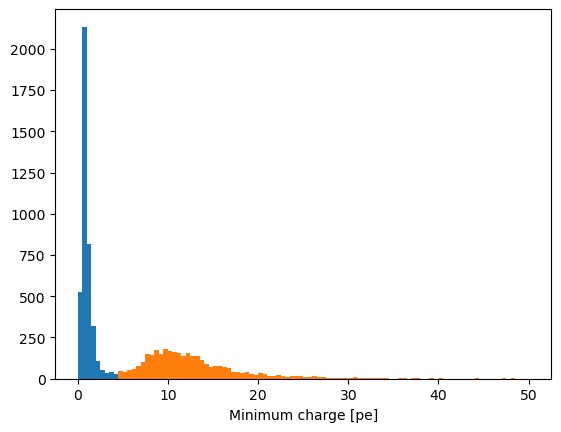

In [129]:
mask_basic = process_result["charge_min"]>0
mask_amp = process_result["charge_min"]>4.5
hist(process_result["charge_min"][mask_basic], bins=100,range=(0,50));
hist(process_result["charge_min"][mask_basic&mask_amp], bins=100,range=(0,50));
# hist(charge_1[mask_basic&mask_amp], bins=100,range=(0,50));
# hist(charge_2[mask_basic&mask_amp], bins=100,range=(0,50));
xlabel("Minimum charge [pe]")
print("Coincidence events",sum(mask_basic&mask_amp))

3.4231518429420884

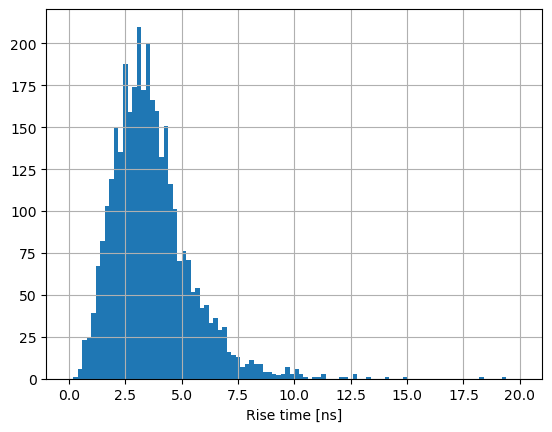

In [140]:
hist(process_result[f"trise_fit_2"][mask_basic&mask_amp],bins=100, range=(0,20));
xlabel("Rise time [ns]")
grid()
np.median(process_result[f"trise_fit_2"][mask_basic&mask_amp])
show()

scatter(process_result[f"amplitude_fit_2"][mask_basic&mask_amp], process_result[f"trise_fit_2"][mask_basic&mask_amp],s=4,alpha=0.3);
ylim(0,20)
xlabel("Amplitude [ns]")
ylabel("Rise time [ns]")


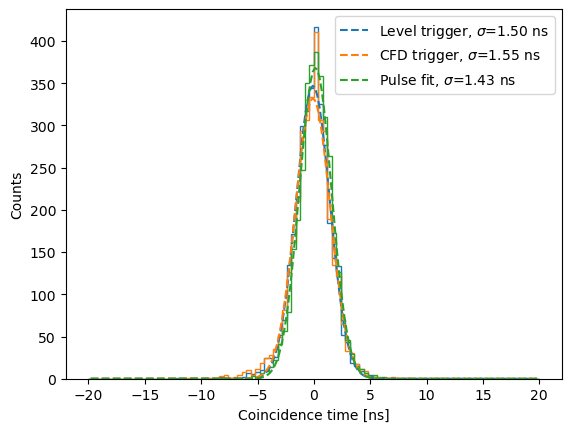

In [105]:
mask = mask_basic&mask_amp
h1 = hist(dt_edge[mask],bins=100,range=(-20,20),histtype="step")#, label="Level trigger");
h2 = hist(dt_cfd[mask], bins=100,range=(-20,20),histtype="step")#, label="CFD trigger");
h3 = hist(dt_fit[mask], bins=100,range=(-20,20),histtype="step")#, label="Fit");


popt, pcov, info, f = hp.fit_hist("gauss", h1, label="Level trigger, $\sigma$={popt[2]:.2f} ns", color="C0", linestyle="--");
popt, pcov, info, f = hp.fit_hist("gauss", h2, label="CFD trigger, $\sigma$={popt[2]:.2f} ns", color="C1", linestyle="--");
popt, pcov, info, f = hp.fit_hist("gauss", h3, label="Pulse fit, $\sigma$={popt[2]:.2f} ns", color="C2", linestyle="--");


legend()
xlabel("Coincidence time [ns]")
ylabel("Counts")
legend()

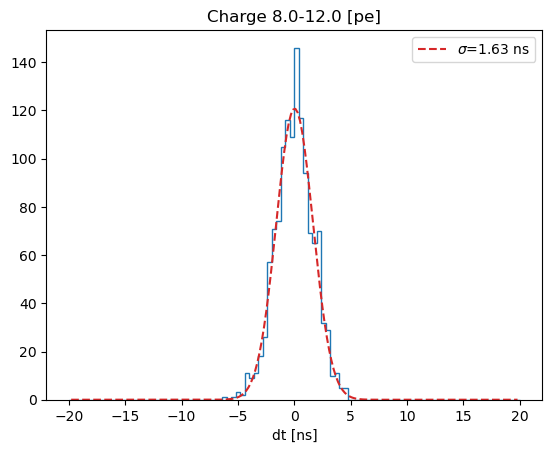

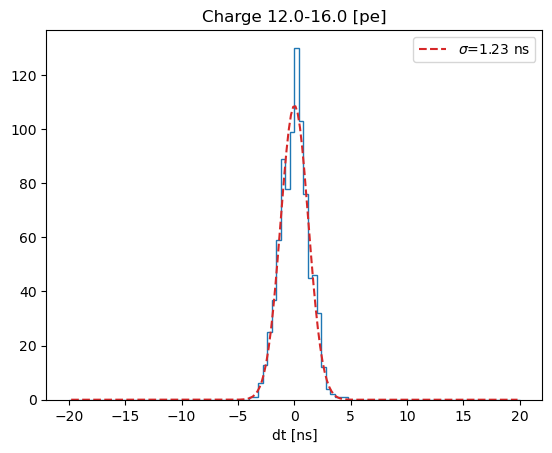

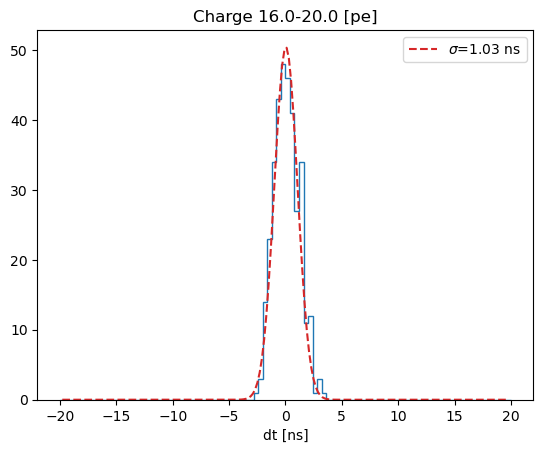

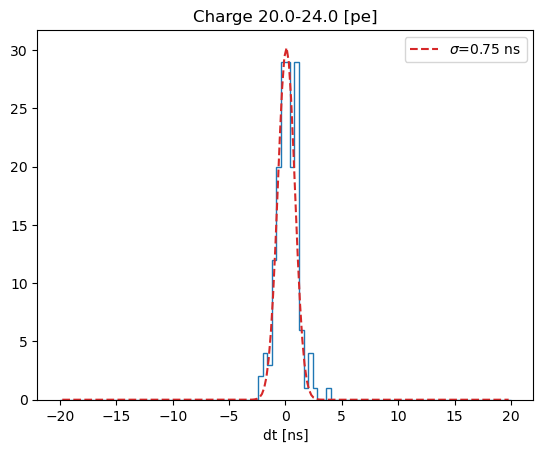

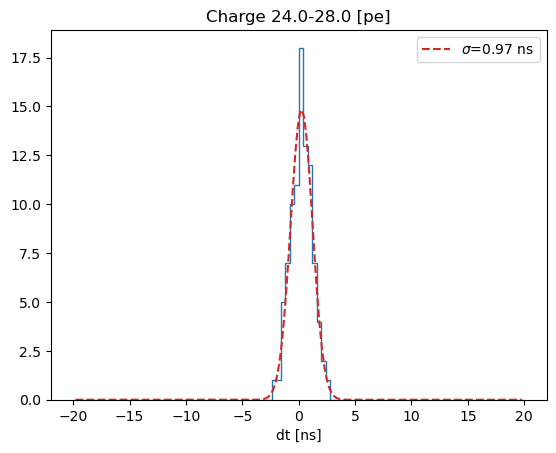

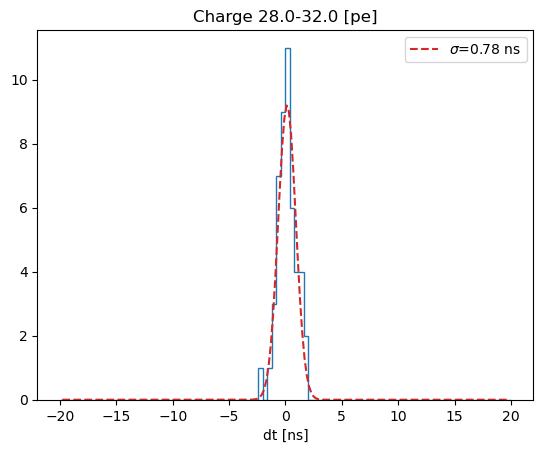

(0.0, 1.1908785187804785)

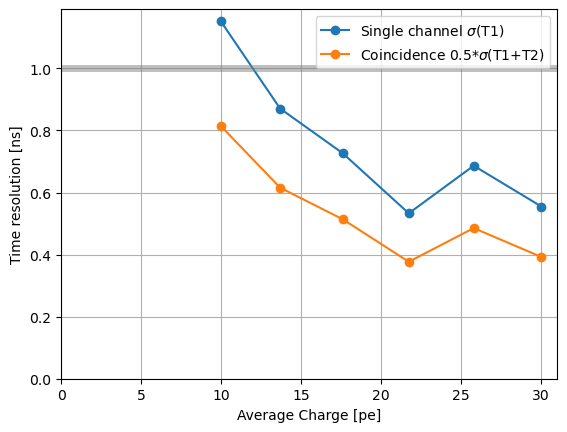

In [125]:
list_charge=[]
list_sigma = []
for i in range(6):
    gap=4
    mask = mask_basic&mask_amp  & (np.abs(process_result["charge_min"]-(10+i*gap))<(gap/2))
    
    h = hist(dt_edge[mask],bins=100,range=(-20,20),histtype="step")#, label="Level trigger");
    popt, pcov, info, f = hp.fit_hist("gauss", h, label="$\sigma$={popt[2]:.2f} ns", color="C3", linestyle="--");
    legend()
    title(f"Charge {10+gap*i-gap/2}-{10+gap*i+gap/2} [pe]")
    xlabel("dt [ns]")
    show()
    
    avg_charge = np.mean(process_result["charge_min"][mask])
    list_charge.append(avg_charge)
    list_sigma.append(popt[2])    
    
list_charge=np.array(list_charge)
list_sigma=np.array(list_sigma)
plot(list_charge, list_sigma/np.sqrt(2), marker="o", label="Single channel $\sigma$(T1)")
plot(list_charge, list_sigma/2, marker="o", label="Coincidence 0.5*$\sigma$(T1+T2)")
xlabel("Average Charge [pe]")
ylabel("Time resolution [ns]")
legend()
grid()
axhline(1, linewidth=5, color="grey", alpha=0.5)
# legend()
xlim(0,)
ylim(0,)

# Analysis 2: Waveform difference

In [83]:
filenames = ["waveform_laser.joblib","waveform_scintillator.joblib","waveform_wlsf_laser.joblib","waveform_wlsf_scintillator.joblib"]
labels = ["Laser", "Scintillator", "WLS+Laser", "WLS+Scintillator"]

In [37]:
data_save=joblib.load(filenames[3])
time_series = data_save["metadata"]["time_series"]*1e9

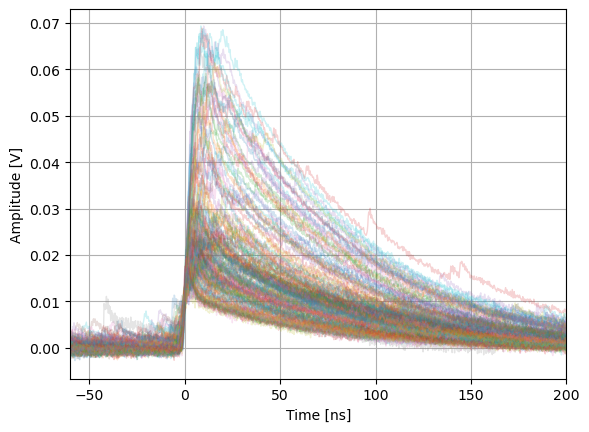

In [69]:
# for i in range(len(data_save[1])):
trace_original = []
trace_aligned = []
for i in range(len(data_save[1])):
    trace = data_save[1][i]
    trace-=np.mean(trace[:1600])
    trace = -trace
    trace/=15.8
    if (max(trace)>0.07) or  (max(trace)<0.01) or (min(trace)<-0.005):
        continue
        
    leading_edges = constant_fraction_discriminator(trace, 0, 0.01, 0.5, gauss_filter=4)
    trigger_offset = leading_edges[0][1]-2048
    trace_original.append(trace)
    trace = np.roll(trace, -trigger_offset)
    trace_aligned.append(trace)
    
    if i <200:
        plot(time_series, trace,alpha=0.2, linewidth=1)

xlim(-60,200)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
grid()

Text(0.5, 0, 'Time [ns]')

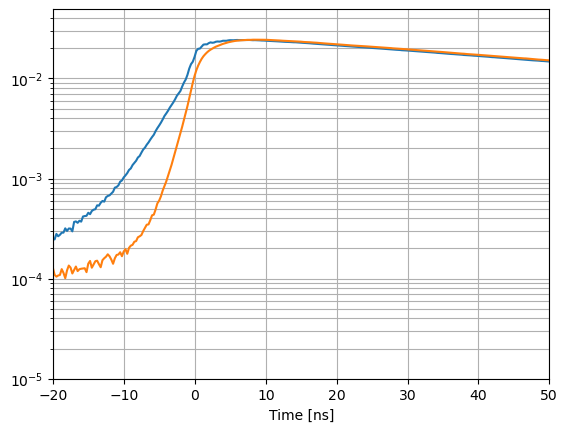

In [81]:
trace_original_avg = np.mean(trace_original, axis=0)
trace_aligned_avg = np.mean(trace_aligned, axis=0)
plot(time_series, trace_original_avg)
plot(time_series, trace_aligned_avg)

yscale("log")
xlim(-20,50)
ylim(1e-5,)
grid(which="both")
xlabel("Time [ns]")

In [82]:
trace_aligned_avg_all = []
for i in range(len(filenames)):
    data_save=joblib.load(filenames[i])
    time_series = data_save["metadata"]["time_series"]*1e9
    
    trace_aligned = []
    for i in range(len(data_save[1])):
        trace = data_save[1][i]
        trace-=np.mean(trace[:1600])
        trace = -trace
        trace/=15.8
        if (max(trace)>0.07) or  (max(trace)<0.01) or (min(trace)<-0.005):
            continue

        leading_edges = constant_fraction_discriminator(trace, 0, 0.01, 0.5, gauss_filter=4)
        trigger_offset = leading_edges[0][1]-2048
        trace = np.roll(trace, -trigger_offset)
        trace_aligned.append(trace)   
        
    trace_aligned_avg = np.mean(trace_aligned, axis=0)
    trace_aligned_avg_all.append(trace_aligned_avg)

Text(0, 0.5, 'Normalized amplitude')

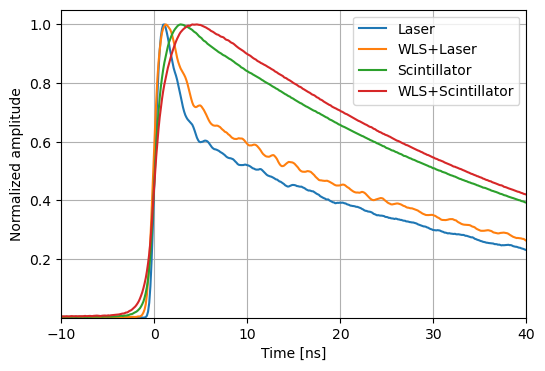

In [184]:
figure(figsize=(6,4))
for i in [0,2,1,3]:
    trace = trace_aligned_avg_all[i]
    plot(time_series, trace/max(trace),label=labels[i])
    
legend()

# yscale("log")
xlim(-10,40)
ylim(1e-5,)
grid(which="both")
xlabel("Time [ns]")
ylabel("Normalized amplitude")